In [67]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [77]:
import utils
from pmsurv.models.exponential_model import ExponentialModel
from pmsurv_exponential import preprocess_data
import arviz as az
import warnings
import matplotlib.pyplot as plt

In [69]:
warnings.filterwarnings('ignore')

In [70]:
dataset, config = utils.load_data("data/aids")

In [71]:
dataset

,age,sex_2,sex_2.1,cd4,priorzdv,hemophil_1,hemophil_1.1,strat2_0,strat2_0.1,strat2_1,...,raceth_3,raceth_3.1,raceth_4,raceth_4.1,raceth_5,raceth_5.1,time,censor,time_d,censor_d
0,34,0.0,0.0,169.0,39.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,189,0,189,0
1,34,1.0,1.0,149.5,15.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,287,0,287,0
2,20,0.0,0.0,23.5,9.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,242,0,242,0
3,48,0.0,0.0,46.0,53.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,199,0,199,0
4,46,0.0,0.0,10.0,12.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,286,0,286,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1146,44,0.0,0.0,65.5,103.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,273,0,273,0
1147,41,0.0,0.0,7.5,20.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,47,1,327,0
1148,43,0.0,0.0,170.0,27.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,272,0,272,0
1149,44,0.0,0.0,282.5,12.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,192,0,192,0


In [72]:
partitions = 8
partition_size = int(len(dataset) / partitions)
print(partition_size)

partition = {}
for i in range(1, partitions+1):
    partition[i] = dataset.iloc[(i-1)*partition_size:i*partition_size, :]
    partition[10+i] = dataset.iloc[:i*partition_size, :]
    # 1: 
    # 2: dataset.iloc[1*partition_size:2*partition_size, :],
    # 3: dataset.iloc[2*partition_size:3*partition_size, :],
    # 4: dataset.iloc[3*partition_size:, :],
    # 11: dataset.iloc[:1*partition_size, :],
    # 12: dataset.iloc[:2*partition_size, :],
    # 13: dataset.iloc[:3*partition_size, :]


143


In [73]:
dataset.iloc[(2-1)*partition_size:2*partition_size, :]

,age,sex_2,sex_2.1,cd4,priorzdv,hemophil_1,hemophil_1.1,strat2_0,strat2_0.1,strat2_1,...,raceth_3,raceth_3.1,raceth_4,raceth_4.1,raceth_5,raceth_5.1,time,censor,time_d,censor_d
143,49,1.0,1.0,165.5,40.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,287,0,287,0
144,29,1.0,1.0,55.0,36.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,132,0,132,0
145,43,0.0,0.0,11.5,10.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,20,1,293,0
146,45,0.0,0.0,263.5,61.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,300,0,300,0
147,41,0.0,0.0,17.5,25.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,91,1,110,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,43,0.0,0.0,155.5,14.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,181,0,181,0
282,47,0.0,0.0,9.5,7.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,104,0,104,0
283,38,0.0,0.0,106.0,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,228,0,228,0
284,37,0.0,0.0,107.5,6.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,263,0,263,0


# First test

In [78]:
model = ExponentialModel()

In [79]:
X_train, y_train = preprocess_data(partition[1], config)
X_test, y_test = preprocess_data(partition[2], config)
X_train, X_test, _ = utils.standardize(X_train, X_test, config)

In [80]:
model.fit(X_train, y_train)

Compiling...
Compilation time =  0:00:07.816890
Sampling...


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Sampling time =  0:00:12.558159
Transforming variables...
Transformation time =  0:00:00.464150
Computing Log Likelihood...
Log Likelihood time =  0:00:00.667251


ExponentialModel()

In [81]:
model.priors['nu']

144

In [82]:
summary = az.summary(model.trace)

In [83]:
summary

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
lambda_intercept,3.654,3.154,-0.696,9.705,0.103,0.077,1200.0,1192.0,1.0
lambda_age,-0.406,0.443,-1.264,0.422,0.008,0.007,3049.0,2509.0,1.0
lambda_sex_2,-0.112,0.652,-1.390,1.086,0.012,0.010,3156.0,2592.0,1.0
lambda_cd4,0.478,0.757,-0.839,2.025,0.014,0.013,3178.0,2361.0,1.0
lambda_hemophil_1,2.243,5.659,-2.674,9.514,0.290,0.206,875.0,435.0,1.0
...,...,...,...,...,...,...,...,...,...
lambda_det[138],9158.164,58928.848,26.561,20004.740,1199.105,847.998,3227.0,2932.0,1.0
lambda_det[139],8151.883,52848.442,20.335,19083.992,1080.051,786.065,3223.0,2889.0,1.0
lambda_det[140],269419.623,3961603.910,31.916,302842.634,65368.950,46226.499,3025.0,3102.0,1.0
lambda_det[141],14758.760,112836.646,7.184,31938.989,2265.303,1602.000,3400.0,3060.0,1.0


In [110]:
new_priors = ExponentialModel._get_default_priors()
for feature in config['features']:
    feature_mu = summary['mean'][f'lambda_{feature}']
    feature_sd = summary['sd'][f'lambda_{feature}']
    new_priors[f'lambda_{feature}_mu'] = feature_mu
    new_priors[f'lambda_{feature}_sd'] = feature_sd
    
new_priors[f'lambda_intercept_mu'] = summary['mean'][f'lambda_intercept']
new_priors[f'lambda_intercept_sd'] = summary['sd'][f'lambda_intercept']
new_priors[f'nu'] = model.priors['nu'] / 4

In [86]:
model.score(X_test, y_test)

Sampling: [y]
INFO:pymc:Sampling: [y]


0.5350047303689688

In [111]:
X_train, y_train = preprocess_data(partition[2], config)
X_test, y_test = preprocess_data(partition[3], config)
X_train, X_test, _ = utils.standardize(X_train, X_test, config)

In [112]:
# model.trace.posterior['lambda_intercept'].values.flatten()

In [113]:
# import pmsurv.models.interpolate
from pmsurv.models.exponential_model import ExponentialModel

In [114]:
model2 = ExponentialModel()
model2.fit(X_train, y_train, priors=new_priors)

Compiling...
Compilation time =  0:00:06.220847
Sampling...


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Sampling time =  0:00:11.688076
Transforming variables...
Transformation time =  0:00:00.342878
Computing Log Likelihood...
Log Likelihood time =  0:00:00.594606


ExponentialModel()

In [91]:
model2.score(X_test, y_test)

Sampling: [y]
INFO:pymc:Sampling: [y]


0.6620816139385602

In [97]:
model2.priors['nu']

287

In [94]:
partition.keys()

dict_keys([1, 11, 2, 12, 3, 13, 4, 14, 5, 15, 6, 16, 7, 17, 8, 18])

In [95]:
X_train, y_train = preprocess_data(partition[12], config)
X_test, y_test = preprocess_data(partition[13], config)
X_train, X_test, _ = utils.standardize(X_train, X_test, config)

In [96]:
X_train.shape

(286, 23)

In [98]:
model2_new = ExponentialModel()
model2_new.fit(X_train, y_train)

Compiling...
Compilation time =  0:00:04.482181
Sampling...


  0%|          | 0/3000 [00:00<?, ?it/s]

  0%|          | 0/3000 [00:00<?, ?it/s]

Sampling time =  0:00:13.169389
Transforming variables...
Transformation time =  0:00:00.884409
Computing Log Likelihood...
Log Likelihood time =  0:00:01.698725


ExponentialModel()

array([[<AxesSubplot: title={'center': 'x'}>]], dtype=object)

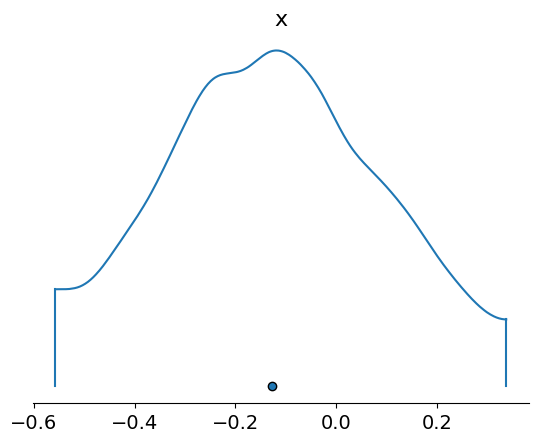

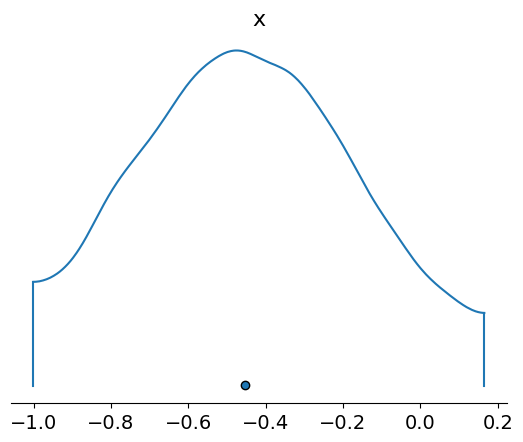

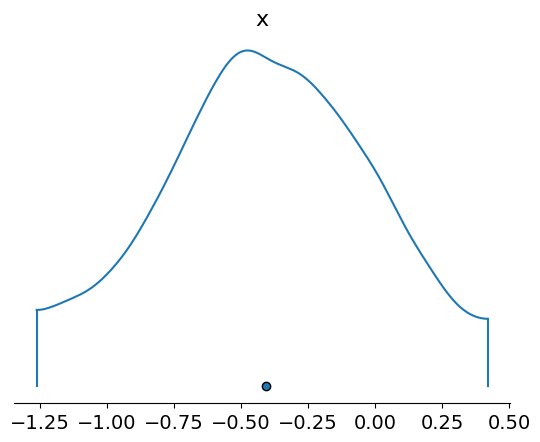

In [118]:
az.plot_density(model2_new.trace.posterior['lambda_age'].values.flatten())
az.plot_density(model2.trace.posterior['lambda_age'].values.flatten())
az.plot_density(model.trace.posterior['lambda_age'].values.flatten())

In [57]:
model2_new.score(X_test, y_test)

Sampling: [y]
INFO:pymc:Sampling: [y]


0.761599119750596

In [109]:
import numpy as np

In [128]:
partition_idx = np.random.randint(8, size=400) + 1

In [133]:
sum(partition_idx == 4)

62

In [138]:
np.arange(0, 1)

array([0])

In [ ]:
('foo', 2)

In [142]:
for i in range(1):
    print(i)

0


# Test 2

In [104]:
def get_priors(summary):
    new_priors = ExponentialModel._get_default_priors()
    for feature in config['features']:
        feature_mu = summary['mean'][f'lambda_{feature}']
        feature_sd = summary['sd'][f'lambda_{feature}']
        new_priors[f'lambda_{feature}_mu'] = feature_mu
        new_priors[f'lambda_{feature}_sd'] = feature_sd / 2
    
    new_priors[f'lambda_intercept_mu'] = summary['mean'][f'lambda_intercept']
    new_priors[f'lambda_intercept_sd'] = summary['sd'][f'lambda_intercept'] / 2
    return new_priors

In [ ]:
models = {}
score = []
for i in range(1, partitions):
    X_train, y_train = preprocess_data(partition[i], config)
    X_test, y_test = preprocess_data(partition[i+1], config)
    X_train, X_test = utils.standardize(X_train, X_test, config)
    models[i] = ExponentialModel()

    if i == 1:
        models[i].fit(X_train, y_train)
    else:
        new_priors = get_priors(az.summary(models[i-1].trace))
        models[i].fit(X_train, y_train, priors=new_priors)
    
    score.append(models[i].score(X_test, y_test))
    print(f'run {i}: {score[i-1]}')
    
print(score)
    

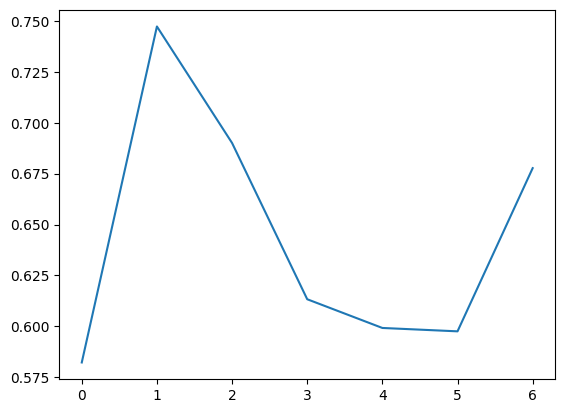

In [103]:
plt.plot(score);

In [92]:
models2 = {}
score2 = []
for i in range(1, partitions):
    X_train, y_train = preprocess_data(partition[10+i], config)
    X_test, y_test = preprocess_data(partition[i+1], config)
    X_train, X_test = utils.standardize(X_train, X_test, config)
    models2[i] = ExponentialModel()
    models2[i].fit(X_train, y_train)
    
    score2.append(models2[i].score(X_test, y_test))
    print(f'run {i}: {score2[i-1]}')
    
print(score2)

Compiling...
Compilation time =  0:00:03.498656
Sampling...
Sampling time =  0:00:26.693845
Transforming variables...
Transformation time =  0:00:01.038447
Computing Log Likelihood...
Log Likelihood time =  0:00:00.776547


Sampling: [y]
INFO:pymc:Sampling: [y]


run 1: 0.5764818355640535
Compiling...
Compilation time =  0:00:04.770088
Sampling...
Sampling time =  0:00:27.081154
Transforming variables...
Transformation time =  0:00:01.973280
Computing Log Likelihood...
Log Likelihood time =  0:00:00.932436


Sampling: [y]
INFO:pymc:Sampling: [y]


run 2: 0.7143520668834185
Compiling...
Compilation time =  0:00:04.695366
Sampling...
Sampling time =  0:00:28.223548
Transforming variables...
Transformation time =  0:00:03.735092
Computing Log Likelihood...
Log Likelihood time =  0:00:01.366206


Sampling: [y]
INFO:pymc:Sampling: [y]


run 3: 0.744955609362389
Compiling...
Compilation time =  0:00:04.760655
Sampling...
Sampling time =  0:00:27.565704
Transforming variables...
Transformation time =  0:00:05.216814
Computing Log Likelihood...
Log Likelihood time =  0:00:01.397640


Sampling: [y]
INFO:pymc:Sampling: [y]


run 4: 0.8126501200960768
Compiling...
Compilation time =  0:00:04.701680
Sampling...
Sampling time =  0:00:26.953438
Transforming variables...
Transformation time =  0:00:07.340397
Computing Log Likelihood...
Log Likelihood time =  0:00:01.837480


Sampling: [y]
INFO:pymc:Sampling: [y]


run 5: 0.7181942544459644
Compiling...
Compilation time =  0:00:05.133096
Sampling...
Sampling time =  0:00:27.970933
Transforming variables...
Transformation time =  0:00:07.788977
Computing Log Likelihood...
Log Likelihood time =  0:00:01.828736


Sampling: [y]
INFO:pymc:Sampling: [y]


run 6: 0.7645914396887159
Compiling...
Compilation time =  0:00:04.815268
Sampling...
Sampling time =  0:00:27.818524
Transforming variables...
Transformation time =  0:00:07.648268
Computing Log Likelihood...
Log Likelihood time =  0:00:02.449217


Sampling: [y]
INFO:pymc:Sampling: [y]


run 7: 0.7292817679558011
[0.5764818355640535, 0.7143520668834185, 0.744955609362389, 0.8126501200960768, 0.7181942544459644, 0.7645914396887159, 0.7292817679558011]


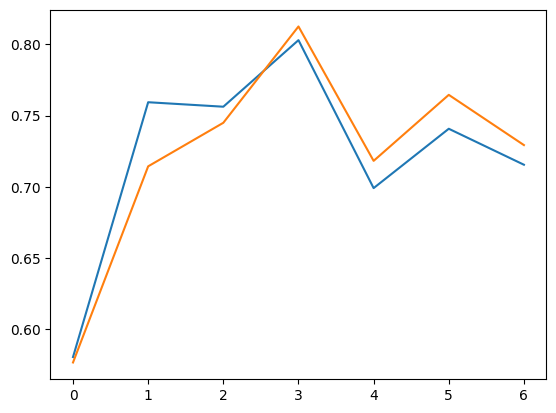

In [93]:
plt.plot(score);
plt.plot(score2);

In [94]:
models3 = {}
score3 = []
for i in range(1, partitions):
    X_train, y_train = preprocess_data(partition[i], config)
    X_test, y_test = preprocess_data(partition[i+1], config)
    X_train, X_test = utils.standardize(X_train, X_test, config)
    models3[i] = ExponentialModel()

    models3[i].fit(X_train, y_train)
    
    score3.append(models3[i].score(X_test, y_test))
    print(f'run {i}: {score3[i-1]}')
    
print(score3)

Compiling...
Compilation time =  0:00:03.758955
Sampling...
Sampling time =  0:00:28.390187
Transforming variables...
Transformation time =  0:00:00.895963
Computing Log Likelihood...
Log Likelihood time =  0:00:00.640366


Sampling: [y]
INFO:pymc:Sampling: [y]


run 1: 0.5793499043977055
Compiling...
Compilation time =  0:00:03.111028
Sampling...
Sampling time =  0:00:27.668350
Transforming variables...
Transformation time =  0:00:00.846871
Computing Log Likelihood...
Log Likelihood time =  0:00:00.639368


Sampling: [y]
INFO:pymc:Sampling: [y]


run 2: 0.777519739897817
Compiling...
Compilation time =  0:00:03.167358
Sampling...
Sampling time =  0:00:26.491538
Transforming variables...
Transformation time =  0:00:01.009011
Computing Log Likelihood...
Log Likelihood time =  0:00:00.753642


Sampling: [y]
INFO:pymc:Sampling: [y]


run 3: 0.8022598870056498
Compiling...
Compilation time =  0:00:05.108829
Sampling...
Sampling time =  0:00:26.952486
Transforming variables...
Transformation time =  0:00:00.949763
Computing Log Likelihood...
Log Likelihood time =  0:00:00.712025


Sampling: [y]
INFO:pymc:Sampling: [y]


run 4: 0.7838270616493195
Compiling...
Compilation time =  0:00:03.320638
Sampling...
Sampling time =  0:00:28.705718
Transforming variables...
Transformation time =  0:00:00.948170
Computing Log Likelihood...
Log Likelihood time =  0:00:00.704734


Sampling: [y]
INFO:pymc:Sampling: [y]


run 5: 0.6689466484268126
Compiling...
Compilation time =  0:00:03.507137
Sampling...
Sampling time =  0:00:26.741326
Transforming variables...
Transformation time =  0:00:00.950038
Computing Log Likelihood...
Log Likelihood time =  0:00:01.914067


Sampling: [y]
INFO:pymc:Sampling: [y]


run 6: 0.7144941634241245
Compiling...
Compilation time =  0:00:03.391756
Sampling...
Sampling time =  0:00:28.027815
Transforming variables...
Transformation time =  0:00:01.026989
Computing Log Likelihood...
Log Likelihood time =  0:00:00.709415


Sampling: [y]
INFO:pymc:Sampling: [y]


run 7: 0.6740331491712708
[0.5793499043977055, 0.777519739897817, 0.8022598870056498, 0.7838270616493195, 0.6689466484268126, 0.7144941634241245, 0.6740331491712708]


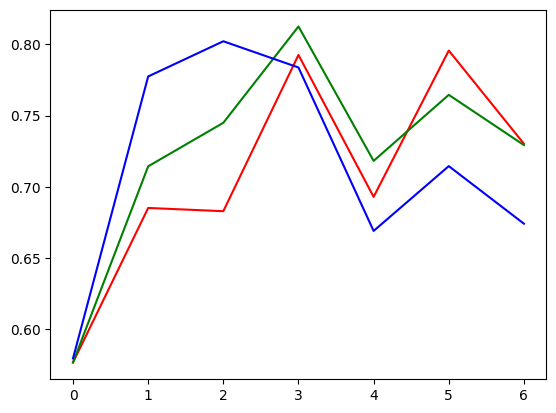

In [106]:
plt.plot(score, color='red');
plt.plot(score2, color='green');
plt.plot(score3, color='blue');